In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import Workbook, load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.image import Image

df = pd.read_csv(r"C:\Users\Msi1\Desktop\Personal Work File\pandas work\Project\BMW_sales.csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [2]:

# Check for missing or duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())


Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64
0


In [22]:
# Total sales by region
sales_by_region = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)

# Total sales by model
sales_by_model = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False)

# Sales by year and fuel type
sales_by_year_fuel = df.groupby(['Year', 'Fuel_Type'])['Sales_Volume'].sum().unstack()

# Transmission trend by year
sales_by_year_trans = df.groupby(['Year', 'Transmission'])['Sales_Volume'].sum().unstack()

#sales by year and fuel type
sales_by_year_fuel = (df.groupby(['Year', 'Fuel_Type'])['Sales_Volume'].sum().unstack(fill_value=0))


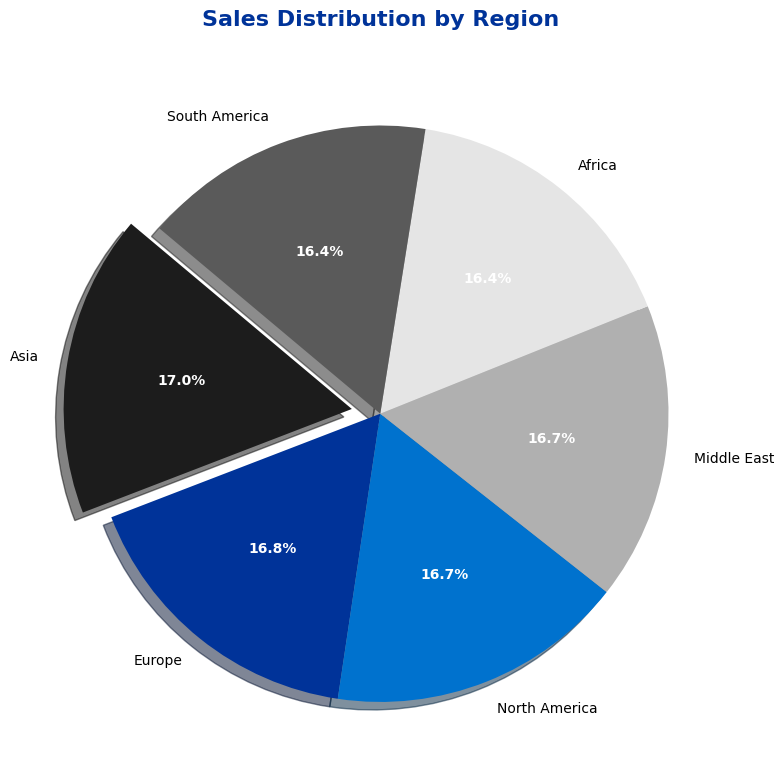

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Identify top region
top_region = sales_by_region.idxmax()
explode = [0.1 if region == top_region else 0 for region in sales_by_region.index]

# BMW-inspired color palette (premium blue-gray-black-white theme)
bmw_colors = ['#1C1C1C', '#003399', '#0072CE', '#B0B0B0', '#E5E5E5', '#5A5A5A', '#4F81BD']

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sales_by_region,
    labels=sales_by_region.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    shadow=True,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'}
)

#text style
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Sales Distribution by Region', fontsize=16, fontweight='bold', color='#003399', pad=20)
plt.tight_layout()
plt.savefig('region_sales_pie_BMWstyle.png', dpi=300, bbox_inches='tight')
plt.show()




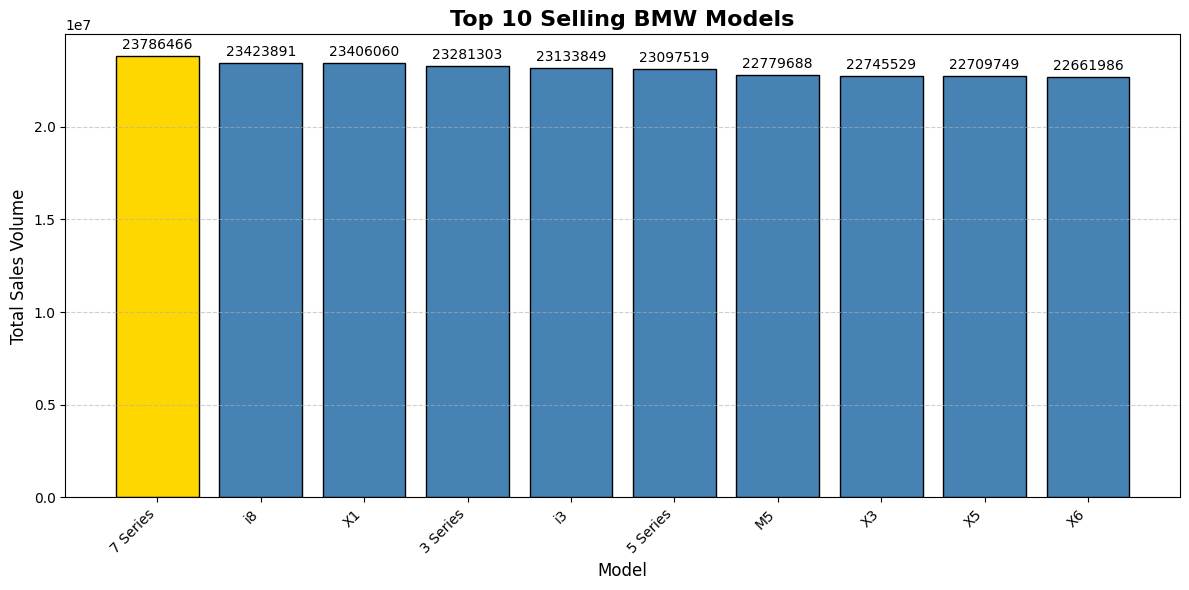

In [38]:
top10 = sales_by_model.sort_values(ascending=False).head(10)
colors = ['steelblue' if x != top10.max() else 'Gold' for x in top10.values]

plt.figure(figsize=(12, 6))
bars = plt.bar(top10.index, top10.values, color=colors, edgecolor='black')
plt.bar_label(bars, fmt='%.0f', padding=3)

plt.title('Top 10 Selling BMW Models', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



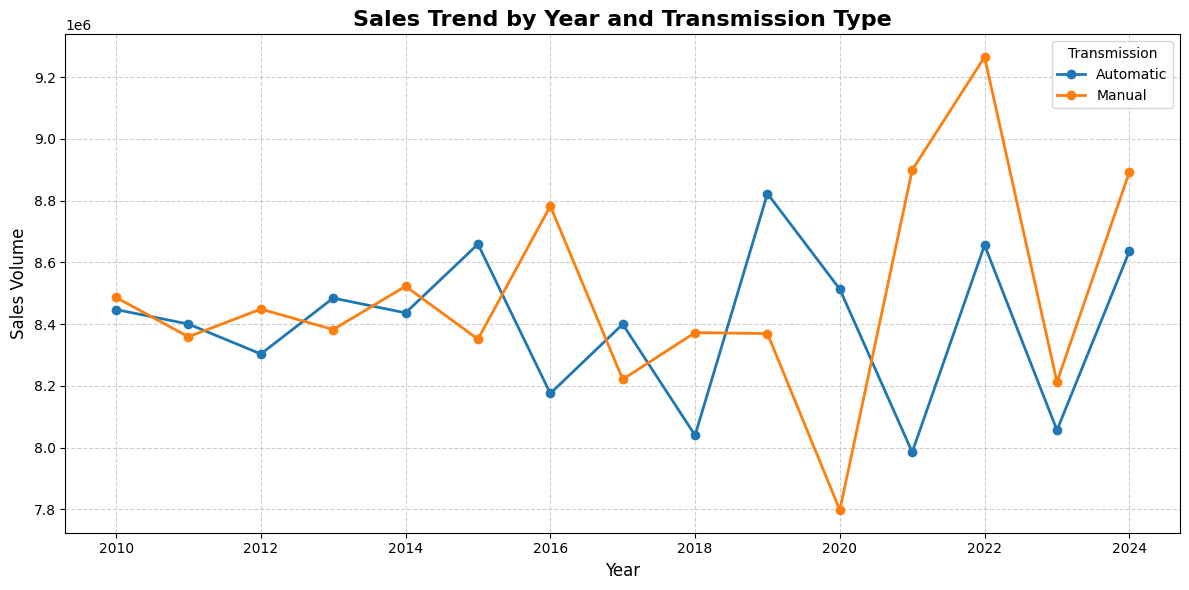

In [16]:
# --- LINE CHART: Sales Trend by Year and Transmission ---
plt.figure(figsize=(12, 6))  # Larger chart
for col in sales_by_year_trans.columns:
    plt.plot(sales_by_year_trans.index, sales_by_year_trans[col],
             marker='o', linewidth=2, label=col)

plt.title('Sales Trend by Year and Transmission Type', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.legend(title='Transmission', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('year_trans_line.png', dpi=300)
plt.show()

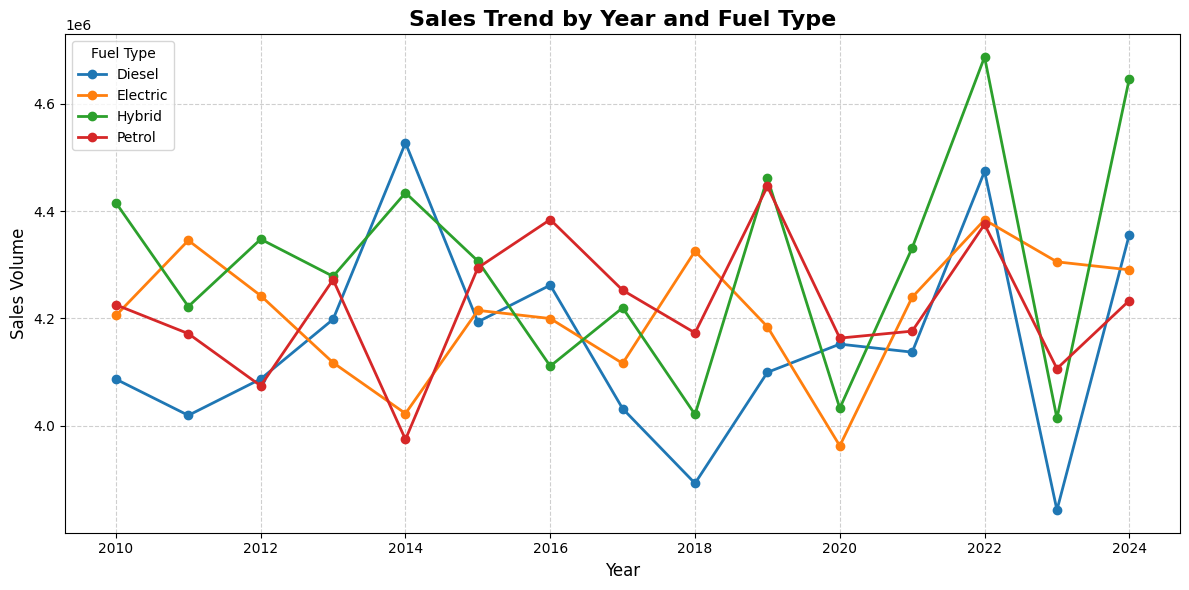

In [40]:
plt.figure(figsize=(12, 6))
for col in sales_by_year_fuel.columns:
    plt.plot(sales_by_year_fuel.index, sales_by_year_fuel[col],
             marker='o', linewidth=2, label=col)

plt.title('Sales Trend by Year and Fuel Type', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.legend(title='Fuel Type', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('year_fuel_line.png', dpi=300)
plt.show()

In [47]:
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Font
from openpyxl.chart import BarChart, Reference, PieChart, LineChart

# Create workbook and sheets
wb = Workbook()
ws_data = wb.active
ws_data.title = "Cleaned Data"
ws_dash = wb.create_sheet("Dashboard")

# --- Add cleaned data ---
for r in dataframe_to_rows(df, index=False, header=True):
    ws_data.append(r)

# --- Create Pivot Table (Total Sales by Region) ---
pivot = df.pivot_table(
    index='Region',
    values='Sales_Volume',
    aggfunc='sum'
).reset_index()

ws_data.append([])
ws_data.append(["Pivot Table - Total Sales by Region"])
for r in dataframe_to_rows(pivot, index=False, header=True):
    ws_data.append(r)

pivot_start = ws_data.max_row - len(pivot) + 1  # Row where pivot data starts

# --- Create Charts on Dashboard ---

## 1️⃣ Bar Chart - Top 10 Models
top10 = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).head(10).reset_index()
ws_dash.append(["Top 10 Selling BMW Models"])
for r in dataframe_to_rows(top10, index=False, header=True):
    ws_dash.append(r)

bar_chart = BarChart()
bar_chart.title = "Top 10 Selling BMW Models"
bar_chart.x_axis.title = "Model"
bar_chart.y_axis.title = "Sales Volume"
data = Reference(ws_dash, min_col=2, min_row=2, max_row=11)  # Sales
cats = Reference(ws_dash, min_col=1, min_row=3, max_row=12)  # Models
bar_chart.add_data(data, titles_from_data=True)
bar_chart.set_categories(cats)
ws_dash.add_chart(bar_chart, "E2")

## 2️⃣ Pie Chart - Sales by Region (from Pivot)
pie = PieChart()
pie.title = "Sales Distribution by Region"
labels = Reference(ws_data, min_col=1, min_row=pivot_start, max_row=pivot_start + len(pivot) - 1)
data = Reference(ws_data, min_col=2, min_row=pivot_start - 1, max_row=pivot_start + len(pivot) - 1)
pie.add_data(data, titles_from_data=True)
pie.set_categories(labels)
ws_dash.add_chart(pie, "E20")

## 3️⃣ Line Chart - Sales Trend by Year & Fuel
trend = df.groupby(['Year', 'Fuel_Type'])['Sales_Volume'].sum().unstack(fill_value=0).reset_index()
ws_dash.append([])
ws_dash.append(["Sales Trend by Year and Fuel Type"])
for r in dataframe_to_rows(trend, index=False, header=True):
    ws_dash.append(r)

line_chart = LineChart()
line_chart.title = "Sales Trend by Year and Fuel Type"
line_chart.x_axis.title = "Year"
line_chart.y_axis.title = "Sales Volume"

rows = ws_dash.max_row - len(trend) + 2
data = Reference(ws_dash, min_col=2, min_row=rows - 1, max_col=ws_dash.max_column, max_row=ws_dash.max_row)
cats = Reference(ws_dash, min_col=1, min_row=rows, max_row=ws_dash.max_row)
line_chart.add_data(data, titles_from_data=True)
line_chart.set_categories(cats)
line_chart.height = 8
line_chart.width = 18
ws_dash.add_chart(line_chart, "E38")

# --- Style Headers ---
for cell in ws_dash[1] + ws_data[1]:
    cell.font = Font(bold=True)

# Save
wb.save("BMW_Sales_Dashboard.xlsx")
print("✅ Excel dashboard created successfully!")


✅ Excel dashboard created successfully!
